#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:
# no. rows and columns
df.shape

(148654, 13)

In [4]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
# check missing values

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
# check missing values %

df.isna().sum()*100/len(df)

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
# I will assume that salary data is in the column named (BasePay), median is 50% 

df['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

In [8]:
# moreover, here are some more statistics,

"Basic Salary mode is {}, range is {}.".format(df['BasePay'].mode()[0],(df['BasePay'].max()-df['BasePay'].min()))

'Basic Salary mode is 0.0, range is 319441.02.'

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [9]:
# For the columns with 100% missing values, let's ensure there is no values in these columns by checking the unique values

print(df['Notes'].unique())
print(df['Status'].unique())

[nan]
[nan]


In [10]:
# we can drop these columns since they don't have any information, let's also drop the id column since
# it does not represent information related to the data

df1=df.drop(columns=['Notes','Status','Id'])
df1.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [11]:
# Now let's check the (Benefits) column as it has 24% missing values, let's view the existing values

df1['Benefits'].value_counts()

Benefits
0.00        1734
7959.18      348
4659.36      107
25699.20      83
37055.22      82
            ... 
669.66         1
753.70         1
1073.31        1
662.98         1
1.24           1
Name: count, Length: 98465, dtype: int64

There are already rows with 0 benefits, so nan values are missing values, not observations with 0 benefits, so let's impute them. There are also missing values in another 3 columns (BasePay, OvertimePay and OtherPay) with small %, so we can impute them as well. 


In [12]:
# Let's first check the correlation between numerical columns.

num_col=df1.select_dtypes(exclude=object)
num_col.corr()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751
OvertimePay,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887
OtherPay,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499
Benefits,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136
TotalPay,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090
TotalPayBenefits,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947
Year,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000


For the Benefits column, It seems that the highest linearly correlated column is TotalPayBenefits. So, I will sort the data by TotalPayBenefits and then use farward fill to impute Benefits using the nearest values.

In [13]:
df2=df1.sort_values(by='TotalPayBenefits')
df2.head(2)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,San Francisco
110530,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco


In [14]:
df2['Benefits'].fillna(method='ffill',inplace=True)

In [15]:
# For the remaining 3 columns, their highest correlation is with TotalPay column. So, I will sort the data using it 
# and follow the same steps

df3=df2.sort_values(by='TotalPay')
df3.tail(2)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,38780.04,538909.28,538909.28,2011,San Francisco
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,38780.04,567595.43,567595.43,2011,San Francisco


In [16]:
# Impute the 3 columns

df3['BasePay'].fillna(method='ffill',inplace=True)
df3['OvertimePay'].fillna(method='ffill',inplace=True)
df3['OtherPay'].fillna(method='ffill',inplace=True)
df3.head(2)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,San Francisco
106964,Gregory D Chew,"Commissioner 16.700c, No Pay",0.0,0.0,0.00,7959.18,0.00,7959.18,2013,San Francisco


In [17]:
# check missing values %

df3.isna().sum()*100/len(df3)

EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

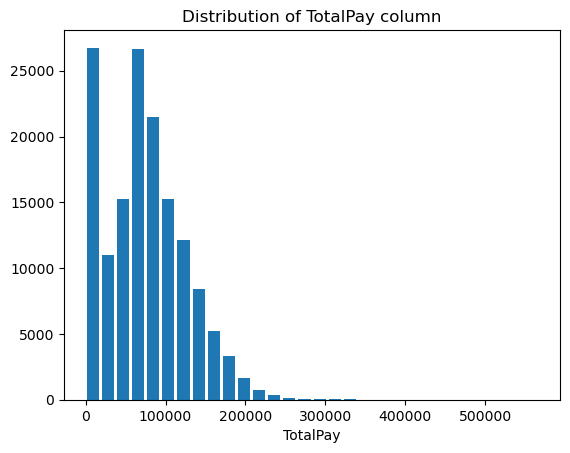

In [18]:
# I will visualize the distribution of salaries in (TotalPay) column

import matplotlib.pyplot as plt

plt.hist(x=df3['TotalPay'],bins=30, rwidth=0.8)
plt.title('Distribution of TotalPay column')
plt.xlabel('TotalPay')
plt.xticks(); 

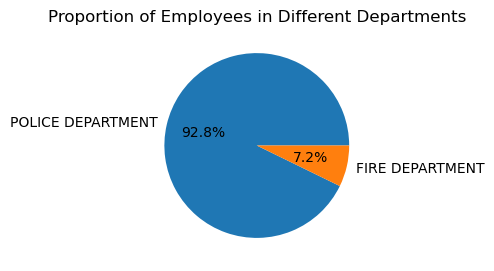

In [19]:
# calculate the proportion of employees in different departments. Department information is written beside the title,
# but not all titles have departments, let's extract the existing ones in a new column named (dept)

df3['dept']=df3['JobTitle'].apply(lambda x: x.split('(')[-1] if 'DEPARTMENT)' in x else 'NA')
df3['dept']=df3['dept'].apply(lambda x:x.replace(')',''))
dept=df3['dept'].value_counts()[1:]
dept.plot.pie(figsize=(5, 3),autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.ylabel('');

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [20]:
# I will group the data by "Year" column

grp=df3.groupby(by='Year').agg({'TotalPayBenefits':['mean','median','min','max']})
grp

TotalPayBenefits                               
                 mean      median     min        max
Year                                                
2011     71744.103871   68213.240    0.00  567595.43
2012    100553.229232  101751.290    1.91  407274.78
2013    101440.519714  101969.445  -33.89  425815.28
2014    100250.918884  101105.370 -618.13  510732.68

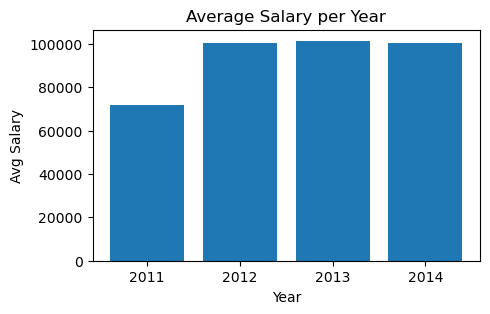

In [21]:
# I will plot a bar chart to compare average salary across different years

plt.figure(figsize=(5,3))
plt.bar(x=grp.index, height=grp.iloc[:,0])
plt.title('Average Salary per Year')
plt.ylabel('Avg Salary')
plt.xlabel('Year')
plt.xticks(ticks=list(grp.index));

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [22]:
# I will calculate the linear correlation between BasePay and different columns

cor=df3.select_dtypes(exclude=object).corr()['BasePay'].sort_values()[1:-1]
cor

OvertimePay         0.268061
OtherPay            0.284165
Benefits            0.906027
TotalPayBenefits    0.946990
TotalPay            0.954878
Name: BasePay, dtype: float64

It seems that the highest correlation is between BasePay and both TotalPay & TotalPayBenefits

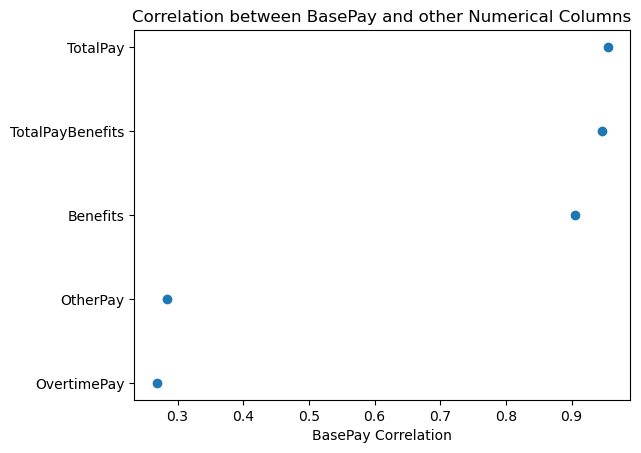

In [23]:
plt.scatter(x=cor,y=cor.index);
plt.title('Correlation between BasePay and other Numerical Columns')
plt.xlabel('BasePay Correlation');

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

* The majority of TotalPay falls between 0 and 100,000.
* I find it a bit strange that some BasePay have -ve values, these might be deductions or installments, also the basic salary mode is 0 which means that this number is the most frequent, workers might be relying on tips or other values like benefits and overtime for their income.
* The majority of employees work in the Police department.
* Average TotalPayBenefits was low in 2011, and it increased with a good percent in 2012 and continued with the same range in the following years 2013 & 2014.
* The higher the BasePay is, the higher the Benefits are.

# Good Luck!